In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Reading Dataset
data = pd.read_csv('faithful.csv')
data.head()

,eruptions,waiting
0,3.600,79
1,1.800,54
2,3.333,74
3,2.283,62
4,4.533,85


In [3]:
data = data.loc[:, ['eruptions', 'waiting']]
data.head(2)

,eruptions,waiting
0,3.6,79
1,1.8,54


In [4]:
X = data.values

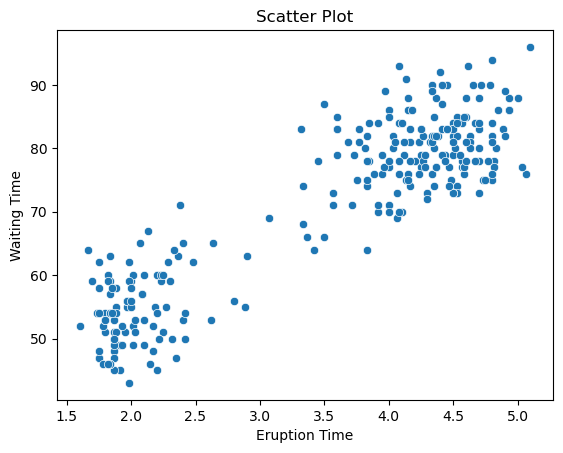

In [16]:
#Scatter plot for Eruption Time vs Waiting Time
sns.scatterplot(X[:,0], X[:, 1])
plt.title('Scatter Plot')
plt.xlabel('Eruption Time')
plt.ylabel('Waiting Time')
plt.show()


In [6]:
#cost function
def calculate_cost(X, centroids, cluster):
  sum = 0
  for i, val in enumerate(X):
    sum += np.sqrt((centroids[int(cluster[i]), 0]-val[0])**2 +(centroids[int(cluster[i]), 1]-val[1])**2)
  return sum

In [7]:
def kmeans(X, k):
  diff = 1
  cluster = np.zeros(X.shape[0])
  centroids = data.sample(n=k).values
  while diff:
     # for each observation
     for i, row in enumerate(X):
         mn_dist = float('inf')
        # dist of the point from all centroids
         for idx, centroid in enumerate(centroids):
            d = np.sqrt((centroid[0]-row[0])**2 + (centroid[1]-row[1])**2)
            # store closest centroid
            if mn_dist > d:
               mn_dist = d
               cluster[i] = idx
     new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values
     # if centroids are same then leave
     if np.count_nonzero(centroids-new_centroids) == 0:
        diff = 0
     else:
        centroids = new_centroids
  return centroids, cluster

In [8]:
cost_list = []
for k in range(1, 10):
    centroids, cluster = kmeans(X, k)
    # WCSS (Within cluster sum of square)
    cost = calculate_cost(X, centroids, cluster)
    cost_list.append(cost)


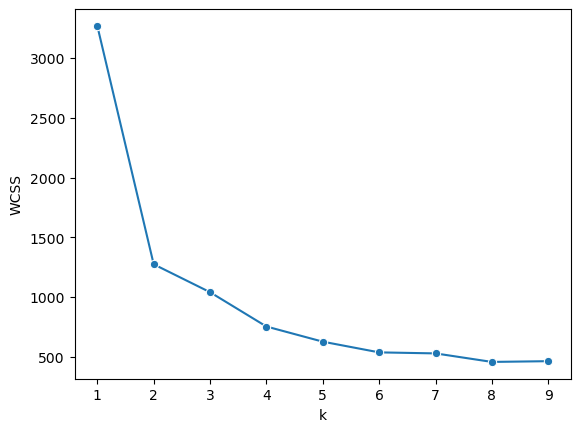

In [9]:
sns.lineplot(x=range(1,10), y=cost_list, marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()

In [10]:
k = 2
centroids, cluster = kmeans(X, k)

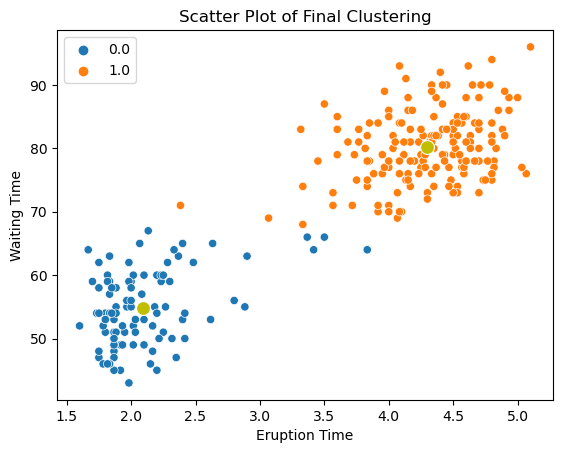

In [23]:
sns.scatterplot(X[:,0], X[:, 1], hue=cluster)
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='y')
plt.xlabel('Eruption Time')
plt.ylabel('Waiting Time')
plt.title('Scatter Plot of Final Clustering')
plt.show()